## PREDICTION OF THREE DIFFERENT BALL IN THREE DIFFERENT GAMES

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize

In [2]:
## creating empty sets 
Target = []
Images = []
Flat_data = []

In [3]:
## Directories
Directory = r'C:\Users\Vivek Raj\Downloads\GAMES'
Categories = ['CRICKET' , 'SOCCER', 'TENNIS']

In [4]:
for category in Categories:
  ## Label endoing the value
  Index = Categories.index(category)

  ## path of the category
  path = os.path.join(Directory , category)

  for img in os.listdir(path):
    img_array = imread(os.path.join(path , img))
    
    ## resize function normalize the data as well

    img_resized = resize(img_array , (150,150,3))
    Flat_data.append(img_resized.flatten())
    Images.append(img_resized)
    Target.append(Index) 

In [5]:
Index

2

In [6]:
Flat_data = np.array(Flat_data)
Target = np.array(Target)
Images = np.array(Images)

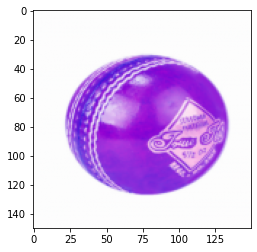

In [7]:
plt.imshow(Images[0])

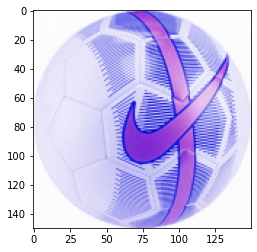

In [8]:
plt.imshow(Images[300])

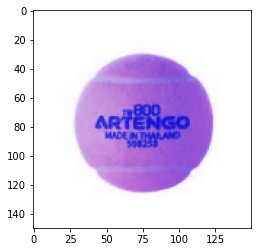

In [9]:
plt.imshow(Images[400])

In [10]:
## Train test split
from sklearn.model_selection import train_test_split

In [11]:
x_train ,x_test ,y_train ,y_test = train_test_split(Flat_data , Target , test_size = 0.2 , random_state = 0)

In [12]:
x_train[0]

array([0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
       0.99215686])

In [13]:
y_train[0]

0

## KNN

In [14]:
## KNN MODEL
from sklearn.neighbors import KNeighborsClassifier

In [15]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [16]:
## GRIDSEARCHCV

from sklearn.model_selection import GridSearchCV

In [17]:
param = {'n_neighbors':[3,4,5,6,8,10] }
model = KNeighborsClassifier()

model_1 = GridSearchCV(model , param , scoring='accuracy' , n_jobs=-1 , cv=4 , verbose =1)

model_1.fit(x_train , y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   50.4s finished


GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 4, 5, 6, 8, 10]},
             scoring='accuracy', verbose=1)

In [18]:
model_1.best_params_

{'n_neighbors': 3}

In [19]:
Model_K_GRID = model_1.best_estimator_

In [44]:
acc_KNN = accuracy_score(y_test , Model_K_GRID.predict(x_test))
acc_KNN

0.7111111111111111

In [47]:
confusion_matrix(y_test , Model_K_GRID.predict(x_test))

array([[39,  0,  6],
       [10,  4,  4],
       [ 4,  2, 21]], dtype=int64)

## LOGISTIC REGRESSION

In [21]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

Model_LG = LogisticRegression()
Model_LG.fit(x_train , y_train)



C:\Users\Vivek Raj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
acc_LG = accuracy_score(y_test , Model_LG.predict(x_test))
acc_LG

0.8555555555555555

In [23]:
confusion_matrix(y_test , Model_LG.predict(x_test))

array([[45,  0,  0],
       [ 2, 12,  4],
       [ 5,  2, 20]], dtype=int64)

In [24]:
accuracy_score(y_train , Model_LG.predict(x_train))

1.0

## NAIVE BAYES

In [25]:
## NAIVE BAYES

from sklearn.naive_bayes import GaussianNB

Model_NB = GaussianNB()
Model_NB.fit(x_train , y_train)


GaussianNB()

In [26]:
acc_NB = accuracy_score(y_test , Model_NB.predict(x_test))
acc_NB

0.7222222222222222

In [48]:
confusion_matrix(y_test , Model_NB.predict(x_test))

array([[32,  7,  6],
       [ 4, 13,  1],
       [ 4,  3, 20]], dtype=int64)

## DECISION TREE

In [27]:
## DECISION TREE

from sklearn.tree import DecisionTreeClassifier

Model_2 = DecisionTreeClassifier()

params = {'max_depth':[2,3,4,5,6],
          'min_samples_split':[5,10,15,20],
          'min_samples_leaf':[3,5,8,10]}

Model = GridSearchCV(Model_2 , params , n_jobs = -1 , verbose = 1)

Model.fit(x_train , y_train)


Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 11.6min finished


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [3, 5, 8, 10],
                         'min_samples_split': [5, 10, 15, 20]},
             verbose=1)

In [28]:
Model_DT = Model.best_estimator_

In [29]:
acc_DT = accuracy_score(y_test , Model_DT.predict(x_test))
acc_DT

0.8555555555555555

In [49]:
confusion_matrix(y_test , Model_DT.predict(x_test))

array([[43,  0,  2],
       [ 1, 13,  4],
       [ 5,  1, 21]], dtype=int64)

## BAGGING

In [30]:
## to enhance the accuracy of decision tree model we apply the ensemble model

## 1.Bagging

from sklearn.ensemble import BaggingClassifier

In [31]:
Model_B = BaggingClassifier(Model_DT , n_estimators = 1000 , n_jobs = -1 , verbose=1)
Model_B.fit(x_train , y_train)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed: 24.1min remaining: 72.4min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed: 24.7min finished


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6,
                                                        min_samples_leaf=3,
                                                        min_samples_split=5),
                  n_estimators=1000, n_jobs=-1, verbose=1)

In [32]:
acc_B = accuracy_score(y_test , Model_B.predict(x_test))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   24.5s remaining:  1.2min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   29.9s finished


In [33]:
acc_B

0.9

In [ ]:
confusion_matrix(y_test , Model_B.predict(x_test))

## RANDOM FOREST

In [34]:
## Random forest
from sklearn.ensemble import RandomForestClassifier

In [35]:
model_4 = RandomForestClassifier()

params = {'n_estimators':[800,1000,1200,1500],
         'max_features':['auto','sqrt','log2'],
         }
model_gs = GridSearchCV(model_4 , params , n_jobs=-1 , verbose=1 )
model_gs.fit(x_train , y_train)

Model_R = model_gs.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.6min finished


In [36]:
acc_R = accuracy_score(y_test , Model_R.predict(x_test))
acc_R

0.9111111111111111

In [ ]:
confusion_matrix(y_test , Model_R.predict(x_test))

## XGB

In [37]:
##XGBOOST

#!pip install xgboost

In [60]:
import xgboost as xgb

In [61]:
Model_XGB = xgb.XGBClassifier(n_estimator=1000 , learning_rate=0.01)

Model_XGB.fit(x_train , y_train)


C:\Users\Vivek Raj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:14:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:14:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimator=1000, n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
acc_XGB = accuracy_score(y_test , Model_XGB.predict(x_test))
acc_XGB

0.8777777777777778

In [64]:
confusion_matrix(y_test , Model_XGB.predict(x_test))

array([[45,  0,  0],
       [ 4, 13,  1],
       [ 3,  3, 21]], dtype=int64)

## SVM

In [37]:
## SVM

from sklearn.svm import SVC

In [38]:
model_6 = SVC()
params = {'C':[0.01,0.1,1,10,100,1000],
         'kernel':['linear','poly','rbf'],
         'degree':[1,2,3,4,5],
         'gamma':[0.01,0.1,0.3]}

model_7 = GridSearchCV(model_6 , params , n_jobs=-1 , verbose=1 , cv=5)
model_7.fit(x_train , y_train)

Model_SVM = model_7.best_estimator_


Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 75.9min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 103.0min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed: 108.3min finished


In [41]:
acc_SVM = accuracy_score(y_test , Model_SVM.predict(x_test))
acc_SVM

0.8777777777777778

In [42]:
confusion_matrix(y_test , Model_SVM.predict(x_test))

array([[45,  0,  0],
       [ 3, 13,  2],
       [ 3,  3, 21]], dtype=int64)

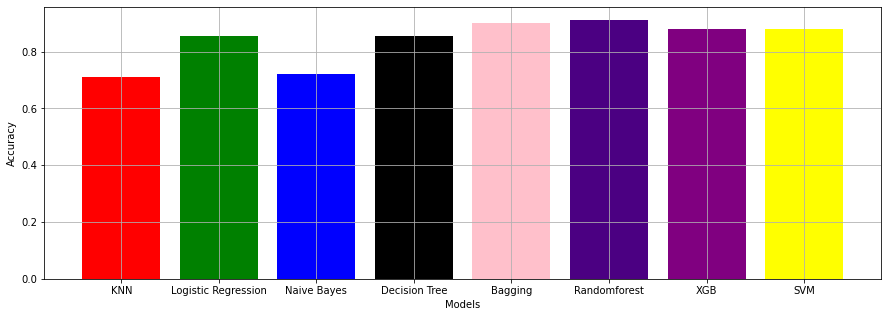

In [66]:
plt.figure(figsize=(15,5))
Model_Accuracy = [acc_KNN , acc_LG , acc_NB , acc_DT , acc_B , acc_R ,acc_XGB , acc_SVM]
Model_Name = ['KNN','Logistic Regression','Naive Bayes','Decision Tree','Bagging','Randomforest','XGB','SVM']
color = ['red','green','blue','black','pink','indigo','purple','yellow']

plt.bar(Model_Name,Model_Accuracy , color = color)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid()
plt.show()